# DATA ANALYTICS LAB (DAL- DA5401) Assignment 6
## Utkarsh Pathak (DA24S011)

## Language Classification using MASSIVE Dataset

Amazon has released a **51-languages parallel dataset** called **MASSIVE** to the public domain. The same dataset is also available on Huggingface at [MASSIVE Dataset on Huggingface](https://huggingface.co/datasets/qanastek/MASSIVE). This dataset consists of sentences from 51 languages, structured in JSON format.

#### JSON Structure:
The JSON structure of the dataset contains the following fields:
```json
['id', 'locale', 'partition', 'scenario', 'intent', 'utt', 'annot_utt', 'tokens', 'ner_tags', 'worker_id', 'slot_method', 'judgments']
```
Subset of Interest:
From these fields, we are particularly interested in the following subset:

locale: Represents the language-country pair (e.g., en-US, es-ES). 

partition: Indicates where the sentence is coming from among {‘train’, ‘test’, ‘validation’}.

utt: Represents the actual sentence.

tokens: Represents the split tokens of the sentence.

Objective:
We aim to build a language classifier that covers all languages with Roman letters.

Note: There is already a classifier built on this dataset for all 51 languages using transformers, which appears to be the current State of the Art (SOTA). You can find the transformer-based classifier at 51-languages classifier.

Our goal is not to compete with transformers. Instead, we aim to use this exercise as a learning opportunity to overcome the challenges in dealing with multilingual datasets.

In [1]:
%pip install datasets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


## TASK 1 : Constructing a Dataset for Roman-Script-Based Languages

We are constructing a dataset using the **MASSIVE** parallel corpus, focusing on 27 languages that use the **Roman script**. The locales that we will include are as follows:

```plaintext
af-ZA, da-DK, de-DE, en-US, es-ES, fr-FR, fi-FI, hu-HU, is-IS, it-IT, jv-ID, lv-LV, ms-MY, nb-NO, nl-NL, pl-PL, pt-PT, ro-RO, ru-RU, sl-SL, sv-SE, sq-AL, sw-KE, tl-PH, tr-TR, vi-VN, cy-GB
```
Task:
We will programmatically extract the utterances ("utt") from the dataset for each of the above locales.

File Output:
For each language locale, we will create a separate file.
Each file will contain one sentence per line.
Since the dataset is a parallel-corpus, all 27 files will end up having the same number of lines.

By the end of this process, we will have 27 files, one for each language locale, containing the extracted sentences.



In [2]:
import pandas as pd
from datasets import load_dataset

# Load the MASSIVE dataset
dataset = load_dataset("qanastek/MASSIVE")

languages = [
    "af-ZA", "da-DK", "de-DE", "en-US", "es-ES", "fr-FR", "fi-FI", "hu-HU",
    "is-IS", "it-IT", "jv-ID", "lv-LV", "ms-MY", "nb-NO", "nl-NL", "pl-PL",
    "pt-PT", "ro-RO", "ru-RU", "sl-SL", "sv-SE", "sq-AL", "sw-KE", "tl-PH",
    "tr-TR", "vi-VN", "cy-GB"]

#created a dictionary to store the extracted utterances
utterances = {lang: [] for lang in languages}

#iterate over the dataset and extract utterances
for sample in dataset["train"]:
    if sample["locale"] in languages:
        utterances[sample["locale"]].append(sample["utt"])

#Save utterances to files in txt format
for lang, utts in utterances.items():
    with open(f"{lang}.txt", "w", encoding="utf-8") as f:
        for utt in utts:
            f.write(utt + "\n")

/speech/utkarsh/espnet/tools/anaconda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## TASK 2 :  Language Classification using Multinomial Naive Bayes on MASSIVE Dataset

In this task, we built a **language classifier** for 27 languages that use **Roman scripts**, extracted from the **MASSIVE dataset**. The classifier was based on the **Multinomial Naive Bayes** algorithm, using a **bag-of-words** approach for feature extraction, and we tuned the model using **GridSearchCV** to optimize the hyperparameter `alpha`.

### 1. Data Preparation
The MASSIVE dataset was loaded from Huggingface using the following locales:
```plaintext
af-ZA, da-DK, de-DE, en-US, es-ES, fr-FR, fi-FI, hu-HU, is-IS, it-IT, jv-ID, lv-LV, ms-MY, nb-NO, nl-NL, pl-PL, pt-PT, ro-RO, ru-RU, sl-SL, sv-SE, sq-AL, sw-KE, tl-PH, tr-TR, vi-VN, cy-GB
```

Split Extraction:
We extracted utterances from the fields 'utt' and 'locale' for the train, validation, and test partitions of the dataset.

### 2. Feature Extraction
A CountVectorizer was used to transform the utterances into a bag-of-words representation, with English stop words removed.
The vectorizer was fitted on the training data and then used to transform the validation and test sets.

### 3. Model Training
A Multinomial Naive Bayes (NB) classifier was trained on the training set using the bag-of-words features.
A GridSearchCV was applied to tune the hyperparameter alpha of the Naive Bayes model using 5-fold cross-validation.

### 4. Best model selection and Evaluation:
After running GridSearchCV, the best alpha was found to be 0.1.  The performance of the model was evaluated using accuracy, classification report (precision, recall, F1-score), and a confusion matrix.
Proper confusion matrix are also plotted to see the relation.
#### The results demonstrate that despite the existence of transformer-based classifiers, Naive Bayes can still provide reasonable performance with relatively simple features like bag-of-words, making it an efficient option for multilingual text classification tasks


Best Alpha: 0.1
Training Metrics with Tuned Model:
Accuracy: 0.9923313968823783
Classification Report:
              precision    recall  f1-score   support

       af-ZA       0.98      0.98      0.98     11514
       cy-GB       1.00      1.00      1.00     11514
       da-DK       0.97      0.97      0.97     11514
       de-DE       1.00      0.99      1.00     11514
       en-US       0.96      0.99      0.97     11514
       es-ES       0.99      0.99      0.99     11514
       fi-FI       1.00      1.00      1.00     11514
       fr-FR       1.00      1.00      1.00     11514
       hu-HU       1.00      1.00      1.00     11514
       is-IS       1.00      1.00      1.00     11514
       it-IT       0.99      1.00      0.99     11514
       jv-ID       1.00      0.99      0.99     11514
       lv-LV       1.00      1.00      1.00     11514
       ms-MY       0.99      1.00      0.99     11514
       nb-NO       0.98      0.97      0.97     11514
       nl-NL       0.99      0.9

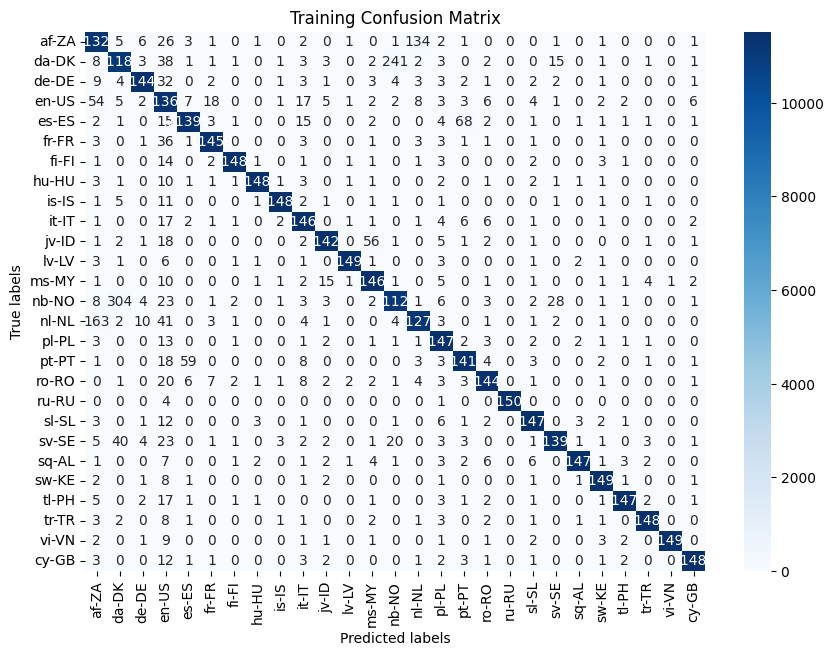

Validation Metrics with Tuned Model:
Accuracy: 0.9839500100198575
Classification Report:
              precision    recall  f1-score   support

       af-ZA       0.90      0.98      0.94      2033
       cy-GB       1.00      0.99      0.99      2033
       da-DK       0.95      0.95      0.95      2033
       de-DE       0.99      0.98      0.99      2033
       en-US       0.93      0.98      0.95      2033
       es-ES       0.99      0.98      0.98      2033
       fi-FI       1.00      0.99      0.99      2033
       fr-FR       0.99      0.99      0.99      2033
       hu-HU       1.00      0.98      0.99      2033
       is-IS       1.00      0.99      0.99      2033
       it-IT       0.99      0.99      0.99      2033
       jv-ID       0.99      0.99      0.99      2033
       lv-LV       1.00      0.99      0.99      2033
       ms-MY       0.99      0.99      0.99      2033
       nb-NO       0.97      0.94      0.95      2033
       nl-NL       0.98      0.97      0.97   

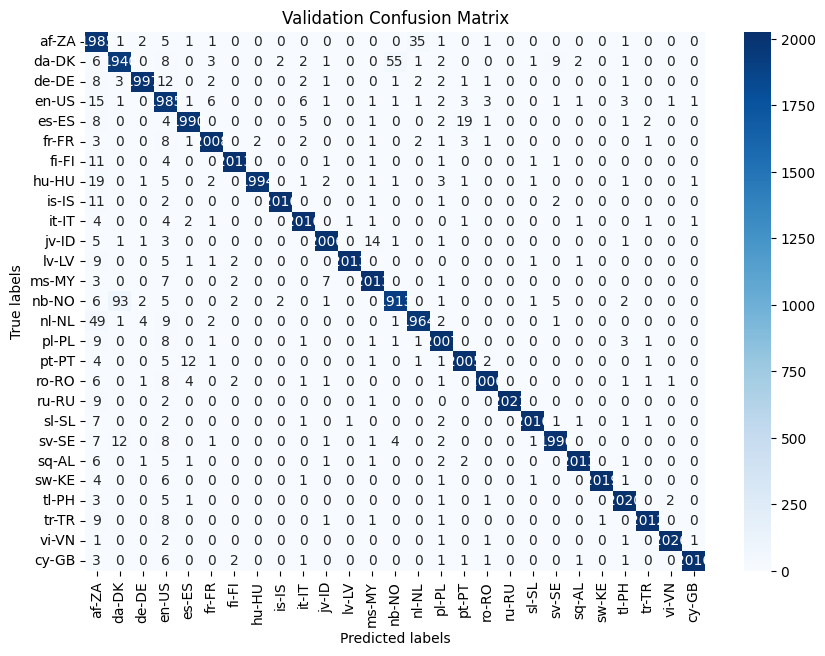

Test Metrics with Tuned Model:
Accuracy: 0.983200079703106
Classification Report:
              precision    recall  f1-score   support

       af-ZA       0.87      0.98      0.92      2974
       cy-GB       1.00      0.99      0.99      2974
       da-DK       0.94      0.96      0.95      2974
       de-DE       1.00      0.99      0.99      2974
       en-US       0.92      0.97      0.94      2974
       es-ES       0.98      0.98      0.98      2974
       fi-FI       1.00      0.99      0.99      2974
       fr-FR       0.99      0.99      0.99      2974
       hu-HU       1.00      0.98      0.99      2974
       is-IS       1.00      0.99      0.99      2974
       it-IT       0.99      0.99      0.99      2974
       jv-ID       0.99      0.98      0.99      2974
       lv-LV       1.00      0.99      0.99      2974
       ms-MY       0.99      0.99      0.99      2974
       nb-NO       0.96      0.94      0.95      2974
       nl-NL       0.98      0.97      0.97      2974

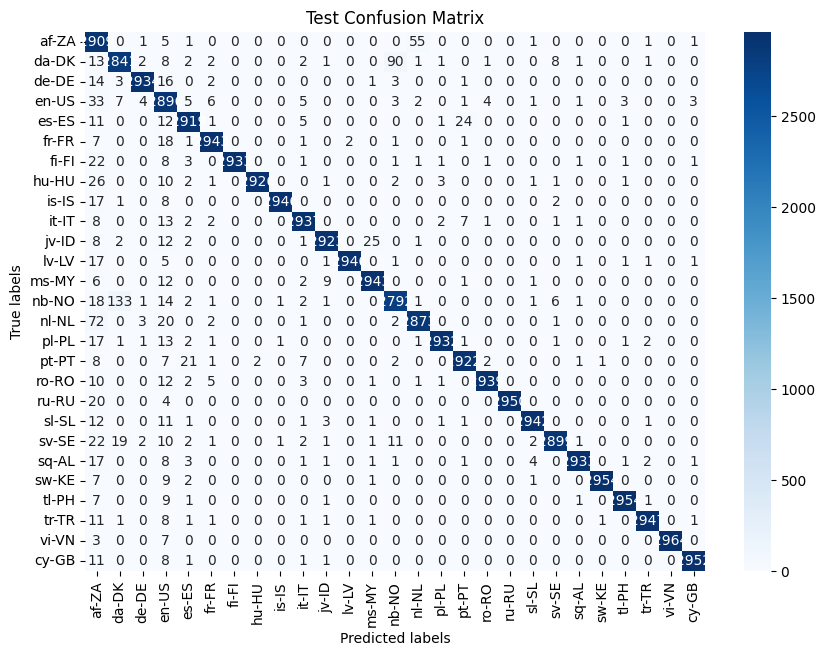

In [3]:
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import GridSearchCV
# Load the MASSIVE dataset with splits
dataset = load_dataset("qanastek/MASSIVE")

languages = [
    "af-ZA", "da-DK", "de-DE", "en-US", "es-ES", "fr-FR", "fi-FI", "hu-HU",
    "is-IS", "it-IT", "jv-ID", "lv-LV", "ms-MY", "nb-NO", "nl-NL", "pl-PL",
    "pt-PT", "ro-RO", "ru-RU", "sl-SL", "sv-SE", "sq-AL", "sw-KE", "tl-PH",
    "tr-TR", "vi-VN", "cy-GB"
]

#A function to extract utterances based on the split
def extract_utterances(split):
    utterances = {lang: [] for lang in languages}
    for sample in dataset[split]:
        if sample["locale"] in languages:
            utterances[sample["locale"]].append(sample["utt"])
    return utterances

# Extracting utterances for train, validation, and test sets using the above function
utterances_train = extract_utterances("train")
utterances_val = extract_utterances("validation")
utterances_test = extract_utterances("test")

# Convert to pandas DataFrames for each split
df_train = pd.DataFrame([(lang, utt) for lang in languages for utt in utterances_train[lang]], columns=["lang", "utt"])
df_val = pd.DataFrame([(lang, utt) for lang in languages for utt in utterances_val[lang]], columns=["lang", "utt"])
df_test = pd.DataFrame([(lang, utt) for lang in languages for utt in utterances_test[lang]], columns=["lang", "utt"])

#Let's createa count vectorizer
vectorizer = CountVectorizer(stop_words="english")

# Fit the vectorizer to the training data and transform all data
X_train_count = vectorizer.fit_transform(df_train["utt"])
X_val_count = vectorizer.transform(df_val["utt"])
X_test_count = vectorizer.transform(df_test["utt"])

# Train a multinomial Naive Bayes classifier on the training set
clf = MultinomialNB()
clf.fit(X_train_count, df_train["lang"])

#a parameter grid to tune alpha for Naive Bayes
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# GridSearchCV with 5-fold cross-validation on the validation set
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_count, df_train["lang"])

best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Using the best model for predictions
clf_best = grid_search.best_estimator_


def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()
    
# Evaluate on train, validation, and test sets
for dataset_name, X, y_true in [("Training", X_train_count, df_train["lang"]), 
                                ("Validation", X_val_count, df_val["lang"]), 
                                ("Test", X_test_count, df_test["lang"])]:
    y_pred = clf_best.predict(X)
    print(f"{dataset_name} Metrics with Tuned Model:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred, languages, title=f'{dataset_name} Confusion Matrix')



# Task 3 : Regularized Discriminant Analysis (RDA) for Language groups based on Contiinent

In this task, we build a **continent classifier** using 27 languages from the **MASSIVE dataset**. These languages represent a diverse set of **Roman-script-based languages** from different continents. The task is to predict the **continent** from which each language comes, using utterances from the dataset. We employ a **Regularized Discriminant Analysis (RDA)** model, which extends the **Linear Discriminant Analysis (LDA)** by introducing a regularization term. The model is fine-tuned using **GridSearchCV** for the regularization parameter `lambda`.

### 1. Data Preparation

#### 1.1 Locale-Continent Mapping
Each locale in the dataset was mapped to a corresponding **continent** as follows:
- **Africa**: af-ZA, sw-KE
- **Asia**: jv-ID, ms-MY, tl-PH, tr-TR, vi-VN
- **Europe**: da-DK, de-DE, es-ES, fr-FR, fi-FI, hu-HU, is-IS, it-IT, lv-LV, nb-NO, nl-NL, pl-PL, pt-PT, ro-RO, ru-RU, sl-SL, sv-SE, sq-AL, cy-GB
- **North America**: en-US

#### 1.2 Train-Validation-Test Split
The dataset was split into **training** (80%), **validation** (10%), and **test** (10%) sets using the following method:
- First, split the data into training (80%) and validation/test (20%).
- Further split the validation/test set into validation (50%) and test (50%).

### 2. Feature Extraction
We used a **TF-IDF Vectorizer** to transform the utterances into **n-grams (uni-grams, bi-grams, and tri-grams)**:
- **Stop words**: English stop words were removed.
- **Maximum features**: 1,35,022 features were selected. (based on total features)
- **TF-IDF transformation**: Applied on the training, validation, and test sets.

### 3. Feature Selection
After transforming the data into TF-IDF vectors, we applied **Chi-squared feature selection** to reduce the feature space to the **top 2,000** features that best explain the variance in the data.

### 4. Model Training

#### 4.1 Regularized Discriminant Analysis (RDA)
We created a custom **Regularized Discriminant Analysis (RDA)** model by introducing a **regularization term** `lambda` that adjusts the covariance matrix:
- This regularization term helps balance the trade-off between the model’s bias and variance, controlling overfitting.
- The parameter `lambda` was tuned using **GridSearchCV** with 5-fold cross-validation.

#### 4.2 Hyperparameter Tuning
The following values for `lambda` were tested during hyperparameter tuning:
```plaintext
[0.1, 0.5, 0.9]
```
The best parameter was selected based on the highest accuracy during cross-validation. 

### 5. Best model selection and Evaluation

The best hyperparameter for `lambda` was found to be: 0.1 and the corresponding cross-validation accuracy came around : 0.957

#### This approach demonstrates that adding regularization in LDA (via RDA) can improve performance on multilingual text classification tasks, especially when dealing with high-dimensional feature spaces.


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

#LEt's use the data stored
utterances = {}
for lang in languages:
    with open(f"{lang}.txt", "r", encoding="utf-8") as f:
        utterances[lang] = [line.strip() for line in f.readlines()]

# Create a pandas dataframe from it
df = pd.DataFrame([(lang, utt) for lang in languages for utt in utterances[lang]], columns=["lang", "utt"])

#the continent mapping
continent_mapping = {
    "af-ZA": "Africa", "da-DK": "Europe", "de-DE": "Europe", "en-US": "North America",
    "es-ES": "Europe", "fr-FR": "Europe", "fi-FI": "Europe", "hu-HU": "Europe",
    "is-IS": "Europe", "it-IT": "Europe", "jv-ID": "Asia", "lv-LV": "Europe",
    "ms-MY": "Asia", "nb-NO": "Europe", "nl-NL": "Europe", "pl-PL": "Europe",
    "pt-PT": "Europe",    "ro-RO": "Europe", "ru-RU": "Europe", "sl-SL": "Europe", "sv-SE": "Europe",
    "sq-AL": "Europe", "sw-KE": "Africa", "tl-PH": "Asia", "tr-TR": "Asia",
    "vi-VN": "Asia", "cy-GB": "Europe"
}

# Map languages to continents
df["continent"] = df["lang"].map(continent_mapping)

# Split data into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(df["utt"], df["continent"], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    stop_words="english", 
    max_features=135022, 
    ngram_range=(1, 3),  # Let's include bi-grams and tri-grams
)
# print("Vocabulary size:", len(vectorizer.vocabulary_))
# print("Feature space dimensionality:", X_train_tfidf.shape)
# Fit the vectorizer to the training data and transform all data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Feature selection using chi-squared statistic
selector = SelectKBest(chi2, k=2000)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_val_selected = selector.transform(X_val_tfidf)
X_test_selected = selector.transform(X_test_tfidf)


# Let's define a custom RDA class with lambda hyperparameter
class RegularizedDiscriminantAnalysis(LinearDiscriminantAnalysis):
    def __init__(self, lambda_=0.5):
        super().__init__()
        self.lambda_ = lambda_

    def fit(self, X, y):
        # Calculate the regularization term
        reg_term = self.lambda_ * np.eye(X.shape[1])
        # Update the covariance matrix
        self.covariance_ = np.linalg.inv(X.T @ X + reg_term)
        # Proceed with standard LDA
        super().fit(X, y)

#Let's set up hyperparameter tuning using GridSearchCV
param_grid = {'lambda_': [0.1, 0.5, 0.9]}  # Fine-tune lambda
rdamodel = RegularizedDiscriminantAnalysis()

#cross-validation on the training set using GridSearchCV
grid_search = GridSearchCV(rdamodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected.toarray(), y_train)

print("Best Lambda:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

#Evaluate the model on the validation set
best_rda = grid_search.best_estimator_
y_pred_val = best_rda.predict(X_val_selected.toarray())

print("Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("Classification Report:")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

# Evaluate the model on the test set
y_pred_test = best_rda.predict(X_test_selected.toarray())
print("Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Best Lambda: {'lambda_': 0.1}
Best Cross-Validation Accuracy: 0.9576521256667642
Validation Metrics:
Accuracy: 0.9602418939783839
Classification Report:
               precision    recall  f1-score   support

       Africa       0.99      0.89      0.94      2284
         Asia       1.00      0.87      0.93      5769
       Europe       0.95      1.00      0.97     21823
North America       0.97      0.84      0.90      1212

     accuracy                           0.96     31088
    macro avg       0.97      0.90      0.94     31088
 weighted avg       0.96      0.96      0.96     31088

Confusion Matrix:
[[ 2038     1   243     2]
 [    4  5039   723     3]
 [   25    15 21753    30]
 [    1     1   188  1022]]
Test Metrics:
Accuracy: 0.9622683993823984
Classification Report:
               precision    recall  f1-score   support

       Africa       0.99      0.90      0.94      2208
         Asia       1.00      0.88      0.93      5702
       Europe       0.95      1.00      0.97 

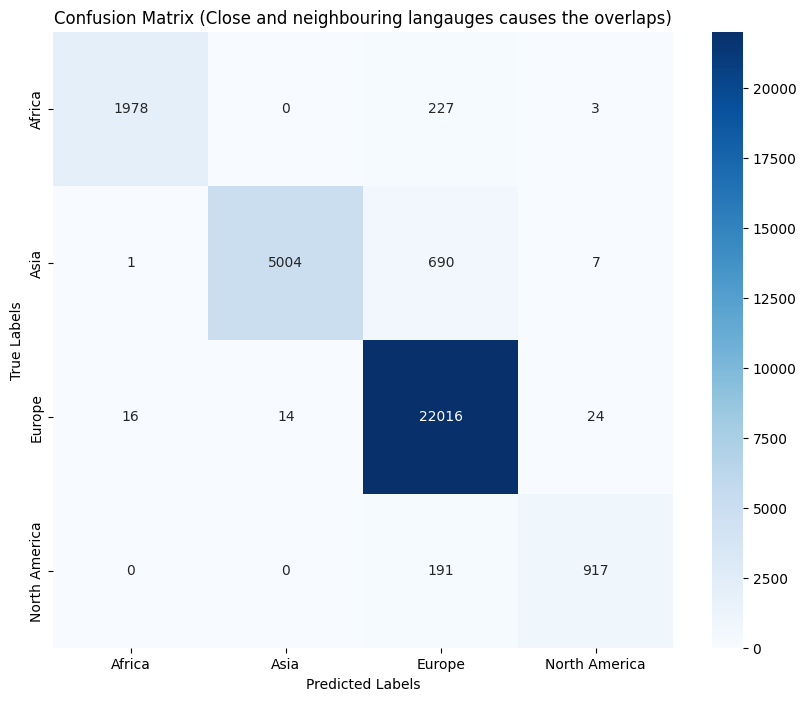

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_test)
labels = np.unique(y_test)

#Let's plot the Confusion matrix to properly see the relation and overlap between langauges and continent
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Close and neighbouring langauges causes the overlaps)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# References    

1. Numpy docs
2. Matplotlib docs
3. Scikit-learn
4. GeeksForGeeks
5. Huggungface docs
6. stackoverflow